In [3]:
import warnings
warnings.filterwarnings('ignore')
#DML
import pandas as pd

#DV
import matplotlib.pyplot as plt
import seaborn as sns

Data Loading

In [4]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
sub = pd.read_csv('data/gender_submission.csv')

### 1. Initial Data Review:



In [5]:
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [6]:
df_test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [7]:
sub.head(3)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0


In [8]:
print(f'Train : {df_train.shape}')
print(f'Test: {df_test.shape}')
print(f'Sub : {sub.shape}')

Train : (891, 12)
Test: (418, 11)
Sub : (418, 2)


### 2. Data Description :
- Survival:	Survival	0 = No, 1 = Yes
- Pclass:	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
- Sex:	    Sex	
- Age:	    Age in years	
- SibSp:	# of siblings / spouses aboard the Titanic	
- Parch:	# of parents / children aboard the Titanic	
- Ticket:	Ticket number	
- Fare:	    Passenger fare	
- Cabin:	Cabin number	
- Embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


### 3. Exploratory Data Analysis 

In [9]:
print(df_train.info())
print('-'*30)
print(df_test.info())

#Missing Values in Age and Cabin vars

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  4

In [10]:
print(df_train.describe())
print('-'*30)
print(df_test.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
------------------------------
       PassengerId      Pclass         Age       S

In [11]:
# Missing Values
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Splitting Num/Cat Var


### Categorical Variables


Sex

In [12]:
df_train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [13]:
pd.pivot_table(df_train,index='Sex',values='Survived')

,Survived
Sex,
female,0.742038
male,0.188908


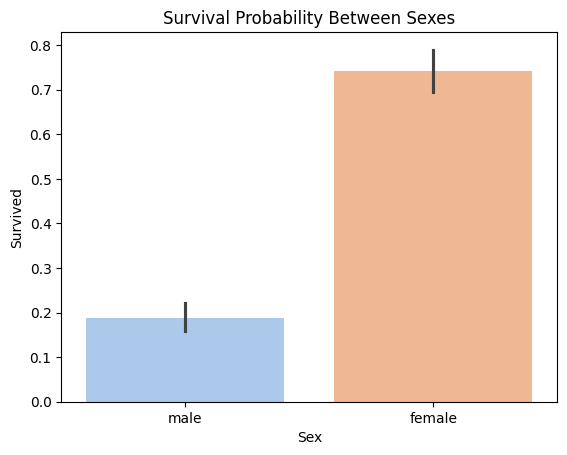

In [14]:
sns.barplot(data= df_train,x='Sex',y='Survived',palette='pastel')
plt.title('Survival Probability Between Sexes')
plt.show()


PClass (Ticket Class)

In [15]:
df_train['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [16]:
pd.pivot_table(df_train,index='Pclass',values='Survived')

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


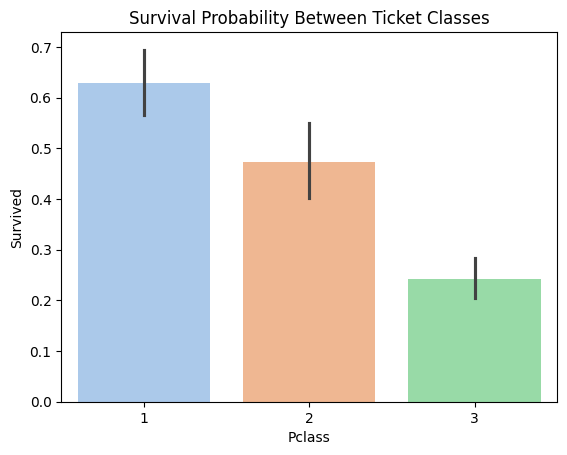

In [17]:
sns.barplot(data= df_train,x='Pclass',y='Survived',palette='pastel')
plt.title('Survival Probability Between Ticket Classes')
plt.show()


Embarked

In [18]:
df_train['Embarked'].value_counts(dropna=True)

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [19]:
pd.pivot_table(df_train,index='Embarked',values='Survived')

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


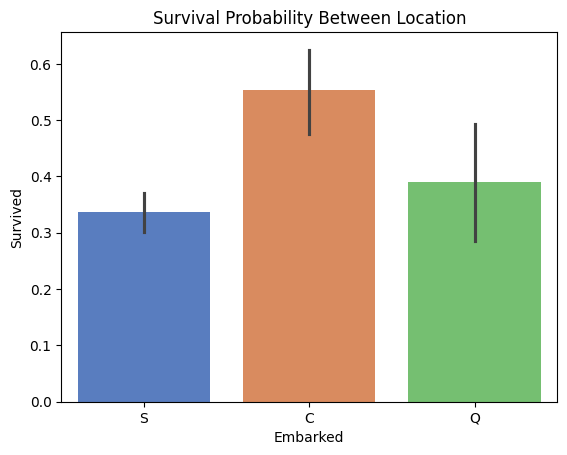

In [20]:
sns.barplot(df_train,x='Embarked',y='Survived',palette='muted')
plt.title('Survival Probability Between Location')
plt.show()

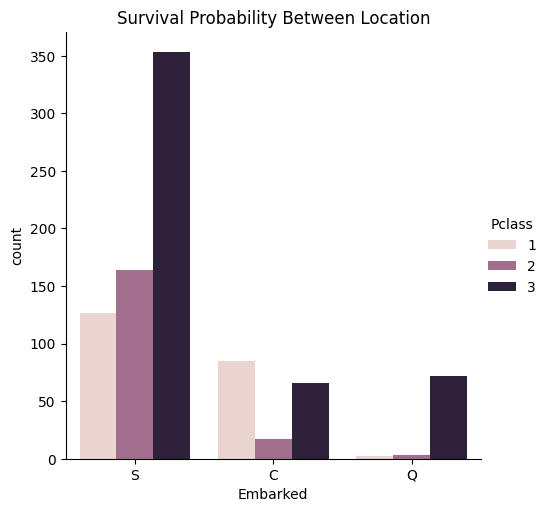

In [21]:
sns.catplot(x='Embarked',data=df_train, hue='Pclass', kind='count')
plt.title('Survival Probability Between Location')
plt.show()

Comments:
- Passenger Class, 1st Class passengers were probably prioritised due to having a higher socioeconomic status.
- Sex, Women were probably prioritised during escape
- Embarked, Cherbourg had the highest amount of 1st class ticket holders, hence highest survival rate.

### Numerical Variables

In [31]:
df_numerical = df_train[['Age','Parch','SibSp','Fare','Cabin','Ticket']]

Age

In [36]:
df_numerical['Age'].isna().sum()
#Missing Values

177

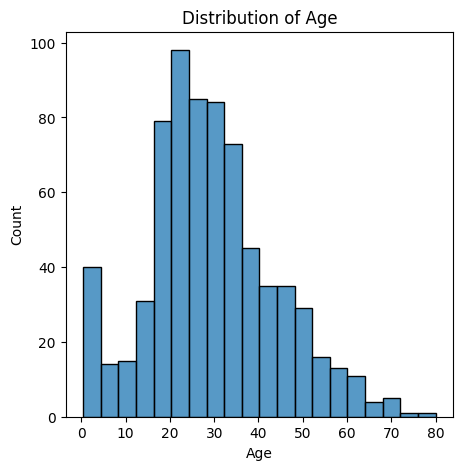

In [54]:
plt.figure(figsize=(5,5))
sns.histplot(plt.figure(figsize=(5,5))
sns.histplot(df_numerical['Age'],palette='pastel')
plt.title('Distribution of Age')
plt.show()

#Shows healthy age pyramid,palette='pastel')
plt.title('Distribution of Age')
plt.show()

#Shows healthy age pyramid

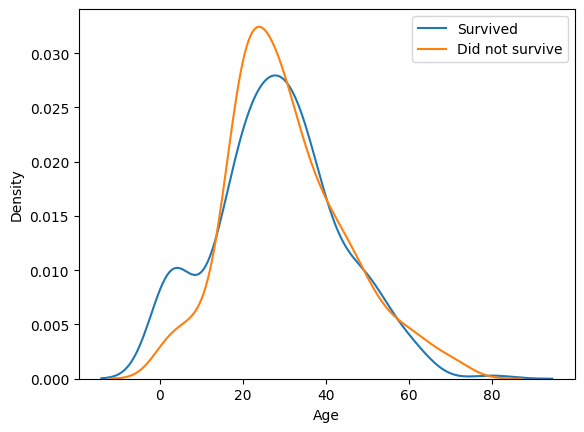

In [69]:
sns.kdeplot(df_train['Age'][df_train['Survived']==1],label = 'Survived')
sns.kdeplot(df_train['Age'][df_train['Survived']==0],label = 'Did not survive')
plt.legend()
plt.show()

Parent Child

In [49]:
df_numerical['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

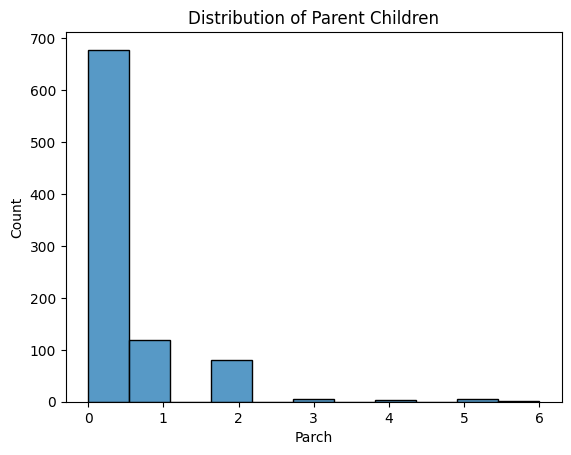

In [50]:
sns.histplot(df_numerical['Parch'])
plt.title('Distribution of Parent Children')
plt.show()

SibSp


In [55]:
df_numerical['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

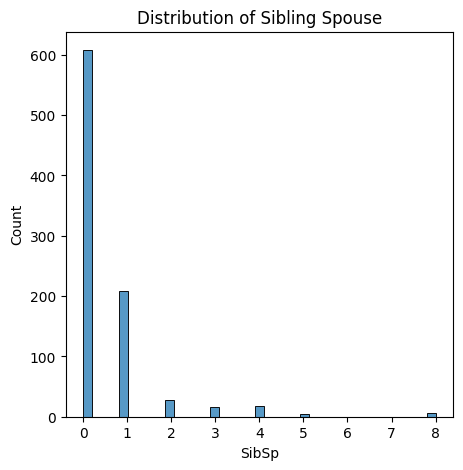

In [56]:
plt.figure(figsize=(5,5))
sns.histplot(df_numerical['SibSp'],palette='pastel')
plt.title('Distribution of Sibling Spouse')
plt.show()
